In [1]:
#import necessary libraries
import pandas as pd
import nltk
import sys # needed this for certain print options during debugging
import numpy as np #lmao why did we not have this before
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /home/blabla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the dataset
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('Steam Game Review.csv')
data.head(2)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1


In [3]:
#dataset facts
data.shape

(17494, 5)

In [4]:
#dataset facts
data['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [5]:
#dataset facts
data['title'].nunique()

44

In [6]:
# Data processing for removing stop words, lemmatization and stemmming, and english-only.
# Importing all relevant libraries and functions here
import spacy #load spacy
from sklearn.pipeline import Pipeline # pipelining pre-processing
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
tokenizer = nlp.tokenizer

In [7]:
#tokenization
def create_tokenized_dataset(data):
    tokens_list = []

    for j in data['user_review']:
#         tokens_list.append(word_tokenize(j))
        spacy_tokens = [token.orth_ for token in tokenizer(j)]
        tokens_list.append(spacy_tokens)
    data['Tokens'] = tokens_list   
    return data

df = create_tokenized_dataset(data)
df.head(1)

,review_id,title,year,user_review,user_suggestion,Tokens
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,"[I, 'm, scared, and, hearing, creepy, voices, ., , So, I, 'll, pause, for, a, moment, and, write, a, review, while, I, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, ., , This, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, (, but, more, bubble, and, ', clean, ', ), ., , Hello, 1990's, ., What, charactes, there, are, (, that, isnot, trying, to, kill, me, ), were, likable, and, a, bit, odd, ., , I, did, do, a, few, noob, things, though, ,, such, as, ...]"


In [8]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
#define stopwords
stopWords = set(stopwords.words('english'))
custom_stop = ["'m", "'ll", "'s", "'re", "n't", "'ve"]
stop_words = set(list(stopWords) + custom_stop)

In [10]:
#define punctuation
custom_punc = ["``", "''", "--", "...","♥"]
punctuation = set(list(string.punctuation) + custom_punc)

In [11]:
# nltk for removing english words
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /home/blabla/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [12]:
#data preprocessing: define functions

# created a function to deal with that pesky steam heart emoticon
# print(ord('♥'))
def remove_steam_heart(tokens):
    for token in tokens:
        if len(token) == 1:
            if(ord(token) == 9829): # 9829 is the unicode for the heart emoticon
                tokens.remove(token)
    return tokens

#lower case
def lower_case(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

#remove stopwords
def remove_stopwords(tokens):
#     tokens = [token for token in tokens if token not in stop_words]
# Using the spacy stop words set instead of the english stop words
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

#remove digits
def remove_digits(tokens):
    for token in tokens:
        if token.isdigit():
            tokens.remove(token)
    return tokens

#remove punctuation
def remove_punctuation(tokens):
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

#lemmatization
def lemmatize_words(tokens):
    for token in range(len(tokens)):
        tokens[token] = lemmatizer.lemmatize(tokens[token])
    return tokens

# Using nltk to word corpus to remove non-english words
# this method seemed cheaper and easier than spacy? maybe lol
def remove_non_english(tokens):
    tokens = [token for token in tokens if token in words]
    return tokens

In [13]:
#data preprocessing function
def data_preprocess(tokens):
    new_tokens = lower_case(tokens)
    new_tokens = remove_steam_heart(new_tokens)
    new_tokens = remove_non_english(new_tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = remove_digits(new_tokens)
    new_tokens = remove_punctuation(new_tokens)
    new_tokens = lemmatize_words(new_tokens)
    return new_tokens
    
list_of_process_tokens = []
for i in df['Tokens']:
    list_of_process_tokens.append(data_preprocess(i))

In [14]:
df['ProcessTokens'] = list_of_process_tokens    
df.sample(20)

,review_id,title,year,user_review,user_suggestion,Tokens,ProcessTokens
10170,15578,theHunter Classic,2018.0,"I downloaded this game with the idea this was a glorified demo for call of the wild. After installing and launching, I'm greeted with a frustratingly slow launcher. Ok, logged in, got some free goodies (some useless reskin of a gun you already have twice, some clothes and a 3 day pass). The gun and the clothes I realy didn't care about, but the 3 day pass pretty much told me this was a pay to play game, not free to play. Than you get your 3 starting licenses... OK fine let's set up a username and an avatar, chose an avatar, start the tutorial. Got into the tutorial, first thing I wanted to do was change the settings as the defaults are absolutely awfull. Hit ESC and... NO OPTIONS MENU?!Had to play trought the tutorial on terrible settings and best of all: the tutorial didn't register my kill, because I didn't ""spot the prey"" correctly, making me miss multiple dead-on shots... Finally get out of the tutorial, back to the launcher and I notice my avatar is not the one I chose... Launching a mission, walk my way over to the a tower and there is absolutely nothing nearby... I'm not going to sit around waiting for 15 minutes for something to come close, I have other♥♥♥♥♥♥to do. I didn't get to experience the pay to win aspect of the game, but even without it, I still wouldn't recomend this game.",0,"[I, downloaded, this, game, with, the, idea, this, was, a, glorified, demo, for, call, of, the, wild, ., After, installing, and, launching, ,, I, 'm, greeted, with, a, frustratingly, slow, launcher, ., Ok, ,, logged, in, ,, got, some, free, goodies, (, some, useless, reskin, of, a, gun, you, already, have, twice, ,, some, clothes, and, a, 3, day, pass, ), ., The, gun, and, the, clothes, I, realy, did, n't, care, about, ,, but, the, 3, day, pass, pretty, much, told, me, this, was, a, pay, to, play, game, ,, not, free, to, play, ., Than, you, get, your, ...]","[game, idea, wild, slow, launcher, logged, got, free, useless, reskin, gun, twice, clothes, day, pas, gun, clothes, care, day, pas, pretty, told, pay, play, game, free, play, starting, fine, let, set, chose, start, tutorial, got, tutorial, thing, change, absolutely, hit, play, tutorial, terrible, best, tutorial, register, kill, spot, prey, correctly, making, miss, multiple, dead, finally, tutorial, launcher, notice, chose, mission, walk, way, tower, absolutely, nearby, going, sit, waiting, come, close, experience, pay, win, aspect, game, game]"
4952,6877,Brawlhalla,2016.0,"Early Access Review1st Game attempt:Ohhh you need to spam mouse 1 and mouse 2 now i get it2nd Game attempt:I Get the combos now3rd attempt:Rank Game,This Game is so hard man4th attempt up to current:I wanted to win but how,I tried Button mashing.That works I guess ROFL7.5/10-Decent 2d platformer GameNickName:Button Mahing Simulator 2.0 =)",1,"[Early, Access, Review1st, Game, attempt, :, Ohhh, you, need, to, spam, mouse, 1, and, mouse, 2, now, i, get, it2nd, Game, attempt, :, I, Get, the, combos, now3rd, attempt, :, Rank, Game, ,, This, Game, is, so, hard, man4th, attempt, up, to, current, :, I, wanted, to, win, but, how, ,, I, tried, Button, mashing, ., That, works, I, guess, ROFL7.5/10, -, Decent, 2d, platformer, GameNickName, :, Button, Mahing, Simulator, 2.0, =)]","[early, access, game, attempt, need, mouse, mouse, game, attempt, attempt, rank, game, game, hard, attempt, current, win, tried, button, mashing, work, guess, decent, platformer, button, simulator]"
17418,25464,School of Dragons,2018.0,"hey guys please help me ;-;i had to restart my computer(i had my reasons) and i forgot about school of dragons, about half year later after i restarted the computer i forgot my password but i remember my acc name, when i try to ""Forgot your password?"" thing it does nothing! I really want my account back :(Can someone help me please? or at least developers from school of dragons? I really love this game! I w

In [15]:
#JUST FOR FUN :)
#most common words for each category (user_suggestion=1 OR user_suggestion=0)

def words_frequency(data, rating_col, token_col, rating_nr):
    all_rating_tokens = []
    tokens = list(data[data[rating_col] == rating_nr][token_col])
    for i in tokens:
        for j in i:
            all_rating_tokens.append(j)
                
    freq = nltk.FreqDist(all_rating_tokens)
    print(freq.most_common()[0:20])
    freq.plot(10, cumulative=False)
    return freq, all_rating_tokens

[('game', 28458), ('like', 7237), ('play', 6765), ('good', 4889), ('time', 4615), ('fun', 4397), ('early', 4005), ('access', 3939), ('free', 3795), ('nope', 3235), ('great', 3005), ('lot', 2629), ('people', 2616), ('new', 2556), ('want', 2130), ('need', 2113), ('better', 1960), ('best', 1903), ('way', 1868), ('try', 1643)]


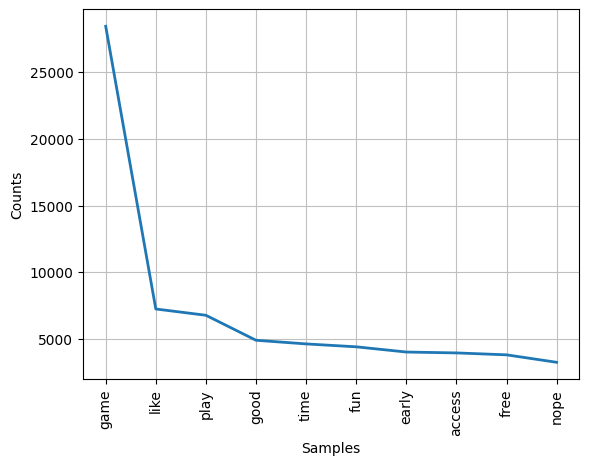

In [16]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 1)

[('game', 23714), ('play', 5105), ('like', 4795), ('time', 4427), ('good', 3012), ('access', 2963), ('early', 2915), ('money', 2892), ('fun', 2566), ('pay', 2379), ('new', 2264), ('want', 2099), ('people', 2095), ('way', 1685), ('free', 1644), ('bad', 1559), ('need', 1553), ('buy', 1530), ('better', 1513), ('lot', 1345)]


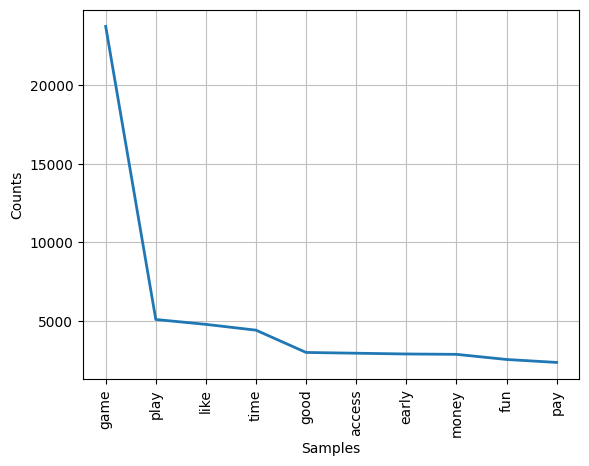

In [17]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 0)

In [18]:
#Converting the datatype of processtokens fromm list to string, so that our vectorization works right.
df['ProcessTokens'] = df['ProcessTokens'].astype("string")

In [24]:
# train test split before normalization
from sklearn.model_selection import train_test_split

X = df.drop(columns=['user_suggestion','review_id', 'year']).copy()
y = df['user_suggestion']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(13995, 4)
(13995,)
(1749, 4)
(1749,)
(1750, 4)
(1750,)


(None, None)

In [27]:
#Check for NaN-Values
print(pd.isna(X_train).values)
print(pd.isna(y_train).values)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]
[False False False ... False False False]


In [20]:
#define text vectorizers (I used two different ones, later we can decide which one we should continue with)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [37]:
#text vectorization with count_vectorizer
#vectorization on train_dataset
def create_vectorized_dataset_count(data):
    list_of_count_vectors = []
    data = data.tolist() # converting to a list
    count_vector = count_vectorizer.fit_transform(data)
    #count_array = count_vector.toarray()
#     Uncomment the two lines below to see the count vector with feature names
#     probably might also need to remove print truncation to see the whole thing.
#     dftemp = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())
#     print(dftemp)
    #return count_array # this is the 2d
    return count_vector

count_vector = create_vectorized_dataset_count(X_train['ProcessTokens']) # this becomes our count vectorization vector.
# we can use thhis to train our model.


In [39]:
#text vectorization with tfidf_vectorizer
#vectorization on train_dataset
def create_vectorized_dataset_tfidf(data):
    data = data.tolist()
    tfidf_vector = tfidf_vectorizer.fit_transform(data)
    #tfidf_array = tfidf_vector.toarray()
    #dftemp = pd.DataFrame(data=tfidf_array, columns=tfidf_vectorizer.get_feature_names())
    #print(dftemp)
    #return tfidf_array
    return tfidf_vector

tfidf_vector = create_vectorized_dataset_tfidf(X_train['ProcessTokens'])

print(tfidf_vector.shape)
#df.head(1)

(13995, 12686)


NOTE: use either Count_Vector or TF-IDF_Vectors column as the input for ML models

Next steps: 
1. define different ML models to work with
2. split the dataset (either Count_Vector or TF-IDF_Vectors) into training and testing data
3. fit the training data to the models
4. make predictions

Further steps:

5. evaluate each model using different evaluation methods (use the testing dataset for this)

In [40]:
#transform count test data

test_count_vector = count_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_count_vector.shape)

n_samples: 1750, n_features: 12686


In [41]:
#transform tfidf test data

test_tfidf_vector = tfidf_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_tfidf_vector.shape)

n_samples: 1750, n_features: 12686


In [42]:
#Naive Bayes with count vector

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(count_vector, y_train)

y_prediction = naive_bayes_classifier.predict(test_count_vector)

print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_prediction)*100)

Multinomial Naive Bayes model accuracy(in %): 82.39999999999999
